# Astro 9

# Lecture 13: Calculus in Python Part 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Integration

Integrate the function $g(t)=exp(−t^2)$ from -3 to 3 using various numerical techniques

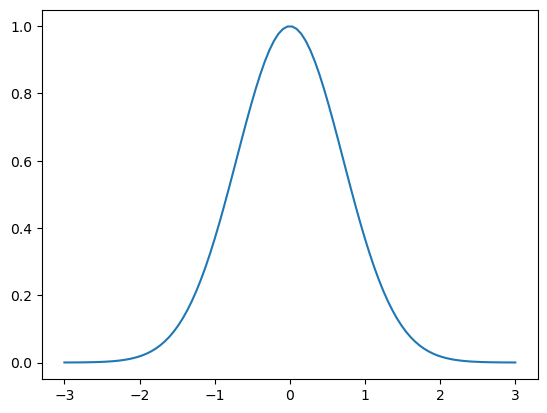

In [2]:
def g1(t):
    return np.exp(-t**2) 

x = np.linspace(-3, 3, 100)
y = g1(x)

plt.plot(x, y)

In [3]:
def Trapezoidal(f, a, b, n):
    h = (b-a)/float(n)
    s = 0.5*(f(a) + f(b))
    for i in range(1,n,1):
        s += f(a + i*h)
    return h*s

In [4]:
a = -3;  b = 3
n = 100

result1 = Trapezoidal(g1, a, b, n)
print (result1)

1.772414253041992


In [5]:
x=np.arange(a, b, (b-a)/n)
y=np.exp(-(x**2))
res1=np.trapz(y,x)
print (res1)

1.7724052632102414


In [6]:
def simpson_rule(f, a, b, n):
    h = (b-a)/float(n)
    s = (f(a) + f(b))/3
    for i in range(1,n,2):
        s += (4*f(a + i*h)+2*f(a+(i+1)*h))/3
    return h*s

In [7]:
result3 = simpson_rule(g1, a, b, n)
print (result3)

1.7724196297413746


In [8]:
from scipy.integrate import simps
import numpy as np
x=np.arange(a, b, (b-a)/n)
y=np.exp(-(x**2))
res3=simps(y,x)
print (res3)

1.772405770498701


In [9]:
from scipy.integrate import quad

res4,eps=quad(g1,a,b)
print (res4, "+/-", eps)

1.7724146965190428 +/- 6.353644780437984e-11


In [10]:
print ('Trapezoid Rule              = ', result1)
print ('Builtin Trapezoid           = ', res1)
print ('Simpsons Rule               = ', result3)
print ('Builtin Simpsons Rule       = ', res3)
print ('Builtin Gaussian Quadrature = ', res4)

Trapezoid Rule              =  1.772414253041992
Builtin Trapezoid           =  1.7724052632102414
Simpsons Rule               =  1.7724196297413746
Builtin Simpsons Rule       =  1.772405770498701
Builtin Gaussian Quadrature =  1.7724146965190428


In [11]:
from math import sqrt, erf, pi

answer = sqrt(pi)*erf(3.) 
print('Error Trapezoid          = ',result1/answer-1)
print('Error Builtin Trapezoid  = ',res1/answer-1)
print('Error Simpsons Rule      = ',result3/answer-1)
print('Error Builtin Simpsons   = ',res3/answer-1)
print('Error Builtin Gauss Quad = ',res4/answer-1)

Error Trapezoid          =  -2.502106595247966e-07
Error Builtin Trapezoid  =  -5.322292135900852e-06
Error Simpsons Rule      =  2.783334138500848e-06
Error Builtin Simpsons   =  -5.0360789484171775e-06
Error Builtin Gauss Quad =  4.440892098500626e-16


Let's look at something we can confirm analytically pretty easily. Let's integrate the derivative we took yesterday from 0 to 5.

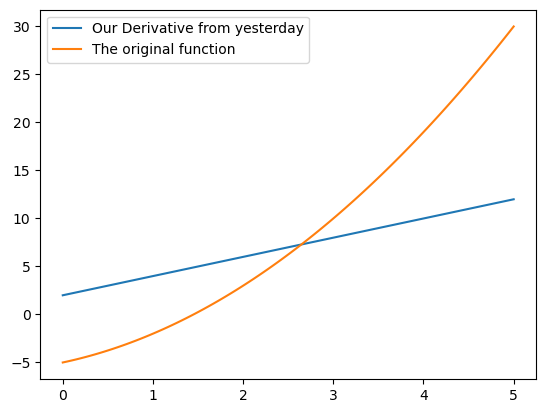

In [12]:
x = np.linspace(0, 5,100)

def func(x):
    y0 = x**2+2*x-5
    y1 = 2*x+2
    return y0, y1 

y0, y1 = func(x)

plt.plot(x, y1, label='Our Derivative from yesterday')
plt.plot(x, y0, label='The original function')
plt.legend()

In [13]:
import time

def func(x):
    return 2*x + 2

int_analytical = x**2+2*x

a = 0;  b = 5
n = 100

"Trapezoid Rule"
tT1 = time.time()
result1 = Trapezoidal(func, a, b, n)
print (result1)
print ('Trapezoid Rule took %1.16f seconds' % (time.time() - tT1))


tT2 = time.time()
x=np.arange(a, b, (b-a)/n)
res1=np.trapz(func(x),x)
print (res1)
print ('Built in Trapezoid Rule took %1.16f seconds' % (time.time() - tT2))

"Simpson's Rule"
tS1 = time.time()
result2 = simpson_rule(func, a, b, n)
print (result2)
print ('Simpsons Rule took %1.16f seconds' % (time.time() - tS1))


tS2 = time.time()
x=np.arange(a, b, (b-a)/n)
res3=simps(func(x),x)
print (res1)
print ('Built in Simpsons Rule took %1.16f seconds' % (time.time() - tS2))

"Gaussian Quadrature"
tG2 = time.time()
res4,eps=quad(func,a,b)
print (res4, "+/-", eps)
print ('Built in Gaussian Quadrature took %1.16f seconds' % (time.time() - tG2))

34.99999999999999
Trapezoid Rule took 0.0010089874267578 seconds
34.4025
Built in Trapezoid Rule took 0.0000000000000000 seconds
35.400000000000006
Simpsons Rule took 0.0000000000000000 seconds
34.4025
Built in Simpsons Rule took 0.0012104511260986 seconds
35.0 +/- 3.885780586188048e-13
Built in Gaussian Quadrature took 0.0011239051818848 seconds


In [14]:
integral = (5**2 + 2*5) - 0
print(integral)

35


## Let's do some more scipy practice

### Double Integral

In [15]:
from scipy.integrate import dblquad

#use the lambda method for this example
f = lambda y, x: x**2 + y**2
result1 = dblquad(f, 0, 2, 0, lambda x: x)
print(result1[0], '+/-', result1[1])


f = lambda x, y: 5
result2 = dblquad(f, 0, np.pi/4, np.sin, np.cos)
print(result2[0], '+/-', result2[1])

5.333333333333333 +/- 1.1765402038992619e-13
2.071067811865475 +/- 5.541640027377969e-14


### Triple Integral

In [16]:
from scipy.integrate import tplquad

f = lambda z, y, x: x*y*z
result3 = tplquad(f, 1, 2, 2, 3, 0, 1)
print(result3[0], '+/-', result3[1])

1.8750000000000002 +/- 3.324644794257407e-14


## Practice Problem

Lets try comparing the different methods and see how the number of slices effects the outcome

$$\int_0^{6.9}\cos\left(\frac{\pi}{2}x^2\right)\, dx$$

In [20]:
from scipy.integrate import simps
from scipy.integrate import quad
from scipy.integrate import trapz

a = 0
b = 6.9
n = 100

x1=np.arange(a, b, 1/(30*n))
x2=np.arange(a, b, 1/(38*n))
x3=np.arange(a, b, 1/(40*n))

def y(x):
    return np.cos(np.pi*(x**2)/2)

dt1=trapz(y(x1),x1)
dt2=trapz(y(x2),x2)
dt3=trapz(y(x3),x3)
ds1=simps(y(x1),x1)
ds2=simps(y(x2),x2)
ds3=simps(y(x3),x3)

dq1,eps=quad(y,a,b)
print('#4:')
print ('Quad Method', dq1, "+/-", eps)
print("")
print ('Trapezoid Method (n = 3000):', dt1)
print ('Simpsons Method (n = 3000):', ds1)
print("")
print ('Trapezoid Method (n = 3800):', dt2) #test many different number of slices until the accuracy of the estimate reaches an acceptable level
print ('Simpsons Method (n = 3800):', ds2)
print("")
print ('Trapezoid Method (n = 4000):', dt3) 
print ('Simpsons Method (n = 4000):', ds3)
print("")
print('Actual Integral =', .473225)
print('The Estimation increased in accuracy as the slices increased up until a certain point, in this case 3800, after which the      estimates grew less accurate with more slices.')



#4:
Quad Method 0.47322531435151366 +/- 1.9407063849864764e-10

Trapezoid Method (n = 3000): 0.4729534091925068
Simpsons Method (n = 3000): 0.4729532926000109

Trapezoid Method (n = 3800): 0.4732253862835866
Simpsons Method (n = 3800): 0.47322531435135284

Trapezoid Method (n = 4000): 0.47302123284551445
Simpsons Method (n = 4000): 0.47302116742845496

Actual Integral = 0.473225
The Estimation increased in accuracy as the slices increased up until a certain point, in this case 3800, after which the      estimates grew less accurate with more slices.
